In [16]:
#import necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [17]:
# data load
df = pd.read_csv("data.csv")
# data show
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [18]:
#By using head function we able to get the 5 data. We have 2 columns in our dataset and the columns name are x and y.

In [19]:
df = df.rename(columns={"x":"height", "y":"weight"})

We rename the column x into height and y into weight

In [20]:
df.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  99 non-null     float64
 1   weight  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [22]:
df.describe()

,height,weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.isna().sum()

height    0
weight    0
dtype: int64

In [25]:
#visualization

Text(0.5, 1.0, 'Height and Weight relation')

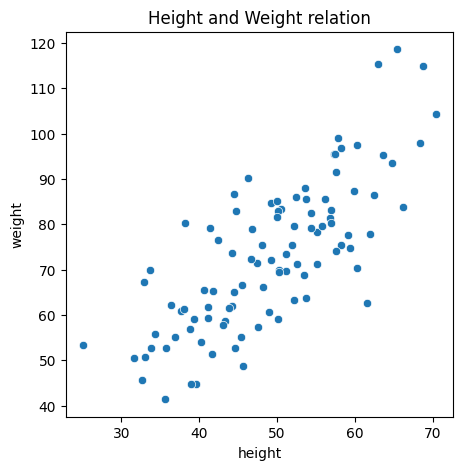

In [26]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= "height", y = "weight", data= df)
plt.xlabel=("value of height")
plt.ylabel=("value of weight")
plt.title("Height and Weight relation")




In [27]:
#find co relation
df.corr()

,height,weight
height,1.000000,0.766264
weight,0.766264,1.000000


<Axes: >

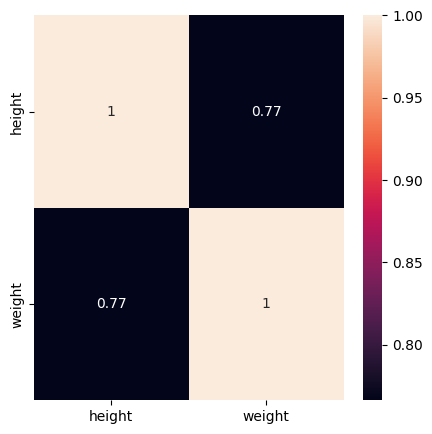

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

In [29]:
#data separation
x=df[["height"]]
y=df[["weight"]]


In [30]:
x.head()

,height
0,48.955889
1,44.687196
2,60.297327
3,45.618644
4,38.816818


In [31]:
y.head()

,weight
0,60.723602
1,82.892504
2,97.379897
3,48.847153
4,56.877213


In [32]:
#split the data
xtrain, xtest, ytrain, ytest= train_test_split(x,y, train_size=.80, random_state=42)

In [33]:
xtrain.head()

,height
49,38.119824
70,53.660932
68,35.678094
15,55.142188
39,44.555608


In [34]:
ytrain.head()

,weight
49,80.166275
70,63.642399
68,52.721735
15,78.211518
39,52.682983


In [35]:
# model implementation
lr = LinearRegression()

In [36]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# train the model
model= lr.fit(xtrain, ytrain)

In [38]:
# cheak the train score
model.score(xtrain, ytrain)

0.5351098913885504

In [39]:
#test the model
model.score(xtest, ytest)

0.692783029905275

In [40]:
#prediction generate
pred_y =model.predict(xtest)
pred_y


array([[ 75.29719392],
       [ 66.95946006],
       [ 74.20168945],
       [ 72.81387336],
       [ 72.86868674],
       [ 80.36896248],
       [ 62.36035101],
       [ 67.63498356],
       [ 80.45372692],
       [ 73.85449589],
       [ 65.88097358],
       [ 59.14640789],
       [ 55.39672654],
       [ 91.78390943],
       [ 53.93498047],
       [ 61.45397362],
       [ 64.82813598],
       [ 85.12188219],
       [ 60.46168253],
       [100.01561951]])

In [41]:
xtest.shape, ytest.shape, pred_y.shape

((20, 1), (20, 1), (20, 1))

In [42]:
pred_y = model.predict([[50]])
pred_y

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[75.13148931]])

In [43]:
df.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [44]:
df["predicted"]= model.predict(df[["height"]])
df.head()

,height,weight,predicted
0,48.955889,60.723602,73.854496
1,44.687196,82.892504,68.633701
2,60.297327,97.379897,87.725565
3,45.618644,48.847153,69.772901
4,38.816818,56.877213,61.453974


In [45]:
df["error"]= df["weight"]- df["predicted"]
df.head()

,height,weight,predicted,error
0,48.955889,60.723602,73.854496,-13.130893
1,44.687196,82.892504,68.633701,14.258803
2,60.297327,97.379897,87.725565,9.654332
3,45.618644,48.847153,69.772901,-20.925748
4,38.816818,56.877213,61.453974,-4.576760


In [46]:
ytest.head()

,weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [47]:
y_pred= model.predict(xtest)

In [48]:
# mse for cheaking error
mse= mean_squared_error(ytest, y_pred)
mse

72.23130683527735

In [49]:
mae= mean_absolute_error(ytest, y_pred)
mse

72.23130683527735

In [50]:
# find the value of m
m = model.coef_
m

array([[1.22304324]])

In [51]:
c = model.intercept_
c

array([13.97932742])

In [52]:
y = m* 50 +c
y

array([[75.13148931]])

Text(0.5, 1.0, 'Height and Weight relation')

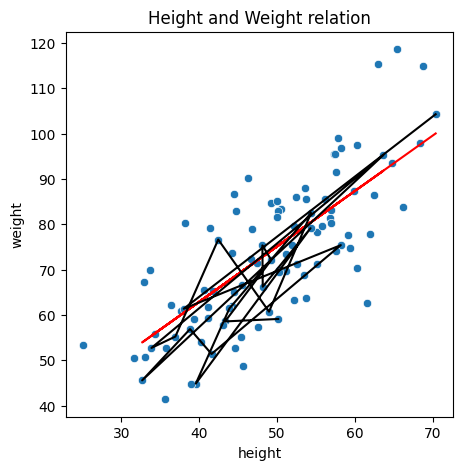

In [53]:
#best fit line
plt.figure(figsize=(5,5))
sns.scatterplot(x= "height", y = "weight", data= df)
plt.plot(xtest, y_pred, color= "r")
plt.plot(xtest, ytest, color= "black")
plt.xlabel=("value of height")
plt.ylabel=("value of weight")
plt.title("Height and Weight relation")
